# Import Libraries

In [207]:
# Python Structs Type using for Wide Variety Mathematical Operations Like Arrays
import numpy as np 

# Working with the DataFrame
import pandas as pd

#Dealing With Warnings
import warnings

In [208]:
# Importing the Model_SVM libarys

from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [209]:
#Store the data into the variable df
df = pd.read_csv('Bit_AfterClean.csv')
#Do not show warnings
warnings.filterwarnings("ignore")

In [210]:
df3 = df.copy()

In [211]:
#A variable for predicting 'n' days out into the future
prediction_days = 30 #n = 30 days

#Create another column (the target or dependent variable)
df['PREDICTION'] = df[['CLOSE']].shift(-prediction_days)

In [212]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(["CLOSE"], axis=1)

In [213]:
#CREATE THE INDEPENDENT DATA SET (X)

# Convert the dataframe to a numpy array and drop the prediction column
X = np.array(df.drop(['PREDICTION'],1))

#Remove the last 'n' rows where 'n' is the prediction_days
X= X[:len(df)-prediction_days]

In [214]:
#CREATE THE DEPENDENT DATA SET (y) 
# Convert the dataframe to a numpy array (All of the values including the NaN's) y = np.array(df['Prediction'])  
# Get all of the y values except the last 'n' rows 
y = np.array(df['PREDICTION']) 
y = y[:-prediction_days] 

# Prepring X,y

In [215]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Set prediction_days_array equal to the last 30 rows of the original data set from the price column
prediction_days_array = np.array(df.drop(['PREDICTION'],1))[:prediction_days]

# Creating and train the Support Vector Models 

In [217]:
# Best Params To SVR_Models
E = [0.1,0.01,0.001,0.0001]
gamma =[1e-07, 1e-06,1e-05]
Cs = [100, 1000, 10000]
param_grid = {'gamma':gamma, 'epsilon' : E, 'C': Cs}
grid_search = GridSearchCV(svm.SVR(), param_grid, cv=5)
grid_search.fit(X, y)
grid_search.best_params_
print(grid_search.best_params_)

{'C': 10000, 'epsilon': 0.0001, 'gamma': 1e-07}


In [218]:
# Create and train the Support Vector Machine 
svr_rbf = SVR(epsilon=0.0001, C=10000, gamma=1e-07)#Create the model
svr_rbf.fit(x_train, y_train) #Train the model

SVR(C=10000, epsilon=0.0001, gamma=1e-07)

# Predict's Results

In [219]:
# Testing Model: Score returns the accuracy of the prediction. 
# The best possible score is 1.0
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print("svr_rbf accuracy: ", svr_rbf_confidence)

svr_rbf accuracy:  0.9195387415464394


In [220]:
# Print the model predictions for the next 'n=30' days
svm_prediction = svr_rbf.predict(prediction_days_array)

In [221]:
svm_prediction

array([41038.22860078, 56422.88460475, 57937.00034826, 56448.99916189,
       57053.35905927, 41454.061158  , 40047.61642188, 39495.88945306,
       35044.52842462, 39700.56886215, 36540.46150182, 36512.39021448,
       40703.04433643, 39410.81966698, 39539.95341666, 46210.93630967,
       39047.49793002, 38849.67293047, 46743.99188341, 56675.83227039,
       57425.69094466, 47723.68518159, 42083.59102312, 48626.39439431,
       54873.03420414, 53513.86543567, 54163.16080336, 52784.53375527,
       49526.19258492, 50379.83436471])

Text(0, 0.5, '$ Close')

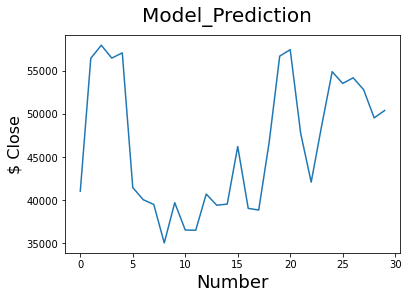

In [222]:
# Plot for the next 'n=30' days
import matplotlib.pyplot as plt
plt.plot(svm_prediction)
plt.suptitle('Model_Prediction', fontsize=20)  
plt.xlabel('Number', fontsize=18)                     
plt.ylabel('$ Close', fontsize=16)

Text(0, 0.5, '$ Price')

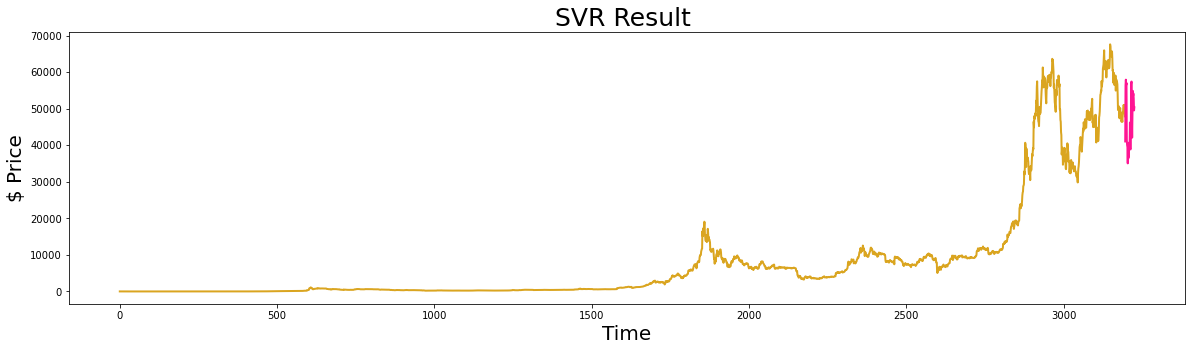

In [223]:
# Will Demonstate the Dates 
time1 =[]
time3 =[]
y = 3196
for i in range(0,3196):
    time1.append(i)
    y-=1

k = 30
for j in range(3196,3226):
    time3.append(j)
    k-=1

#Time-line Plots
plt.figure(figsize = (20, 5))
plt.plot(time1[0:3196], df3["CLOSE"][::-1], color='goldenrod', lw=2)
plt.plot(time3, svm_prediction, color='deeppink', lw=2)
plt.title("SVR Result ", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)